# **Maestría en Inteligencia Artificial Aplicada**
## **Curso: Inteligencia Artificial y Aprendizaje Automático**
### Tecnológico de Monterrey
### Prof Luis Eduardo Falcón Morales

## **Adtividad de la Semana 6**
### **Árboles de decisión y bosque aleatorio.**


**Nombres y matrículas de los integrantes del equipo:**

*   Roberto Carlos Avelar Sigüenza $\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,$ A01016798
*   Andrés Eduardo Figueroa García $\,\,\,\,\,\,\,\,\,\,\,\,\,\,$ A01378536
*   Rubén Marcos Ramos Guerrero $\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,$ A01793131
*   Juan Sebastián Téllez López $\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,$ A01793859
*   Isaac Francisco Viramontes Castillo $\,\,\,\,\,\,\,\,\,$ A01793679


En cada sección deberás incluir todas las líneas de código necesarias para responder a cada uno de los ejercicios.

In [ ]:
# Incluye aquí todos módulos, librerías y paquetes que requieras.
import os
import pandas as pd
import numpy as np


from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler  
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import learning_curve, validation_curve
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import make_scorer
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns  
import sys

# Para crear gráfica de árbol de decisión
from sklearn import tree
import pydotplus 
import graphviz
from IPython.display import Image

pd.set_option('display.max_columns', None)

# **Ejercicio-1.** 

Carga los datos y sustituye los nombres de las columnas del alemán al inglés de acuerdo a como
se indica en la página de la UCI.

Se carga el archivo "SouthGermanCredit.asc" utilizando Pandas

In [ ]:
#absolute_path = os.getcwd()
#relative_path = "sample_data/SouthGermanCredit.asc"

#DIR = os.path.join(absolute_path, relative_path)
#os.chdir(DIR)

df = pd.read_csv("/content/sample_data/SouthGermanCredit.asc", sep=" ")

Se muestran los nombres de las columnas actuales.

In [ ]:
df.columns

Index(['laufkont', 'laufzeit', 'moral', 'verw', 'hoehe', 'sparkont', 'beszeit',
       'rate', 'famges', 'buerge', 'wohnzeit', 'verm', 'alter', 'weitkred',
       'wohn', 'bishkred', 'beruf', 'pers', 'telef', 'gastarb', 'kredit'],
      dtype='object')

Se cambian los nombres de las columnas a los nombres sugeridos en inglés en la página de UCI Machine Learning Repository.

In [ ]:
df.rename(columns = {'laufkont'  : 'status', 
                     'laufzeit'  : 'duration', 
                     'moral'     : 'credit_history', 
                     'verw'      : 'purpose', 
                     'hoehe'     : 'amount', 
                     'sparkont'  : 'savings', 
                     'beszeit'   : 'employment_duration', 
                     'rate'      : 'installment_rate', 
                     'famges'    : 'personal_status_sex', 
                     'buerge'    : 'other_debtors', 
                     'wohnzeit'  : 'present_residence', 
                     'verm'      : 'property', 
                     'alter'     : 'age', 
                     'weitkred'  : 'other_installment_plans', 
                     'wohn'      : 'housing', 
                     'bishkred'  : 'number_credits', 
                     'beruf'     : 'job', 
                     'pers'      : 'people_liable', 
                     'telef'     : 'telephone', 
                     'gastarb'   : 'foreign_worker', 
                     'kredit'    : 'credit_risk'}, inplace = True)

Se valida que los nombres de las columnas fueron cambiados.

In [ ]:
df.columns

Index(['status', 'duration', 'credit_history', 'purpose', 'amount', 'savings',
       'employment_duration', 'installment_rate', 'personal_status_sex',
       'other_debtors', 'present_residence', 'property', 'age',
       'other_installment_plans', 'housing', 'number_credits', 'job',
       'people_liable', 'telephone', 'foreign_worker', 'credit_risk'],
      dtype='object')

In [ ]:
q2 = df[df['credit_risk'] == 1]['credit_risk'].size
q4 = df[df['credit_risk'] == 0]['credit_risk'].size
qt = df['credit_risk'].size

print('Benign: {} ({:.2f}%)'.format(q2, q2/qt*100))
print('Malign: {} ({:.2f}%)'.format(q4, q4/qt*100))

Benign: 700 (70.00%)
Malign: 300 (30.00%)


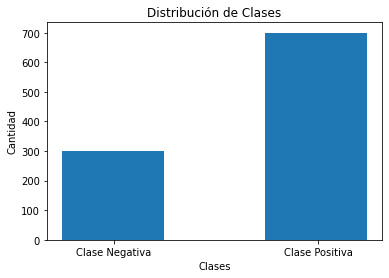

In [ ]:
df['credit_risk'].hist(grid=False, bins=3)
plt.xticks(labels=['Clase Negativa', 'Clase Positiva'], ticks=[0.17, 0.84])
plt.xlabel('Clases')
plt.ylabel('Cantidad')
plt.title('Distribución de Clases')
plt.show()

Se muestran los tipos de variables de cada columna para ver si coinciden con los que se describen en la página de UCI Machine Learning Repository

In [ ]:
df.dtypes

status                     int64
duration                   int64
credit_history             int64
purpose                    int64
amount                     int64
savings                    int64
employment_duration        int64
installment_rate           int64
personal_status_sex        int64
other_debtors              int64
present_residence          int64
property                   int64
age                        int64
other_installment_plans    int64
housing                    int64
number_credits             int64
job                        int64
people_liable              int64
telephone                  int64
foreign_worker             int64
credit_risk                int64
dtype: object

Se modifican los tipos de variables conforme a los que deben de corresponderles.

In [ ]:
df = df.astype({'status'                  : 'category' , # categorical
                'duration'                : 'int64' ,    # quantitative
                'credit_history'          : 'category' , # categorical
                'purpose'                 : 'category' , # categorical
                'amount'                  : 'int64' ,    # quantitative; result of monotonic transformation
                'savings'                 : 'category' , # categorical
                'employment_duration'     : 'int64' ,    # ordinal; discretized quantitative
                'installment_rate'        : 'int64' ,    # ordinal; discretized quantitative
                'personal_status_sex'     : 'category' , # categorical
                'other_debtors'           : 'category' , # categorical
                'present_residence'       : 'int64' ,    # ordinal; discretized quantitative
                'property'                : 'int64' ,    # ordinal
                'age'                     : 'int64' ,    # quantitative
                'other_installment_plans' : 'category' , # categorical
                'housing'                 : 'category' , # categorical
                'number_credits'          : 'int64' ,    # ordinal, discretized quantitative
                'job'                     : 'int64' ,    # ordinal
                'people_liable'           : 'int64' ,    # binary, discretized quantitative
                'telephone'               : 'bool' ,     # binary
                'foreign_worker'          : 'bool' ,     # binary
                'credit_risk'             : 'bool'  })   # binary 

Se valida que los tipos de variable fueron correctamente cambiados.

In [ ]:
df.dtypes

status                     category
duration                      int64
credit_history             category
purpose                    category
amount                        int64
savings                    category
employment_duration           int64
installment_rate              int64
personal_status_sex        category
other_debtors              category
present_residence             int64
property                      int64
age                           int64
other_installment_plans    category
housing                    category
number_credits                int64
job                           int64
people_liable                 int64
telephone                      bool
foreign_worker                 bool
credit_risk                    bool
dtype: object

In [ ]:
#Generamos una copia del dataframe para tener un respaldo
df_resp = df.copy()

# **Ejercicio-2.**

Realiza una partición de los datos en el conjunto de entrenamiento del 85% y el de prueba de 15%. Los modelos se estarán entrenando con el método de validación cruzada, así que no es necesario en este paso generar el conjunto de validación. Define como la variable X a todas las variables de entrada y a la variable Y como la variable de salida.

Se definen el conjunto de datos de entrada X y Y, como lo indican las instrucciones.

In [ ]:
X = df.drop(columns = ["credit_risk"])
Y = df["credit_risk"]

Se realiza una partición de los datos, donde el 85% se destina a entrenamiento y el 15% a prueba.

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.85, random_state=1)

# **Ejercicio-3.**

Como una primera aproximación (baseline) realizarás las siguientes transformaciones mínimas para generar los primeros modelos. En la misma página de la UCI se indica el tipo de variable de cada uno de los factores. Definen cuatro tipo de variables: categórica (categorical), ordinal (discretized quantitative), numérica (quantitative) y binaria (binary). Con base a dicha información realiza un Pipeline que incluya al menos las siguientes transformaciones:

1. Imputación a todas las variables de entrada, diferenciando entre el tipo de cada variable (decide y justifica que tipo de imputación realizas en cada caso).

2. Realiza un análisis de las variables numéricas (quantitative) de entrada y aplica una transformación que escale a todas ellas en un rango equiparable.

3. Aplica la transformación One-Hot encoding a las variables de entrada de tipo categórico y binaria. En particular, justifica por qué una variable binaria requeriría que se le aplique la transformación one-hot encoding. Por el momento dejar las variables ordinales sin transformar.

El primer paso es separar las variables (features) en:

*    numérica (quantitative) 
*    categórica (categorical) 
*    binaria (binary)
*    ordinal (discretized quantitative) 

[Los tipos se encuentran documentadios de acuerdo a la definición de UCI Machine Learning](https://archive.ics.uci.edu/ml/datasets/South+German+Credit#)



In [ ]:
quantitative_features = ['duration', 'amount', 'age']

categorical_features = ['status', 'credit_history', 'purpose', 'savings', 'personal_status_sex', 'other_debtors', 'other_installment_plans', 'housing', 'people_liable', 'telephone', 'foreign_worker']

ordinal_features = ['employment_duration', 'installment_rate', 'present_residence', 'property', 'number_credits', 'job']

### **a) Imputación de Variables**

Aunque el dataframe de este ejercicio no tiene datos faltantes se va a realizar la imputación para que el modelo esté preparado para manejar esta situación, en este sentido se propone reaizar las siguientes imputaciones:

Cuantitativas: Se propone realizar una sustitución por la media, ya que al ser un valor continuo, es una forma de disminuir el impacto de esta variable en nuestras métricas estadísticas.

Categóricas: Se propone realizar una sustitución por la moda, ya que al ser una variable categórica y sustituir por el valor más común, por 'probabilidad', es el valor que tienen más oportunidad de estar en ese dato faltante.

Ordinales: Se propone realizar una sustitución por la moda, ya que al ser una variable similar a la categórica, hace sentido que el manejo sea el mismo.

Para realizar este proceso vamos a usar las clases 
**```SimpleImputer, ColumnTransformer, StandardScaler, OneHotEncoder, Pipeline```**, el caso de las variables cuantitativas lo vamos a abordar en el paso siguiente.

Se puede consultar un ejemplo practico del uso de estas clases en el sitio [Column Transformer with Mixed Types](https://scikit-learn.org/stable/auto_examples/compose/plot_column_transformer_mixed_types.html) 

In [ ]:
ordinal_transformer = Pipeline(
    [('imputer_ordinal', SimpleImputer(strategy='median'))]
)

### **b) Realiza un análisis de las variables Numéricas (quantitative) de entrada y aplica una transformación que escale a todas ellas en un rango equiparable.**

Para hacer el análisis de las variables cuantitativas, a diferencia de lo que las variables categóricas, no existe una forma obvia de agrupar los datos, por tal motivo lo que se suele hacer es, dividir los posibles valores en diferentes contenedores(bins) del mismo tamaño y luego contar el número de casos que cae dentro de cada uno de los contenedores. Estos contenedores junto con sus recuentos, nos proporcionan una imagen de la distribución de la variable cuantitativa y constituyen la base para poder graficar el histograma.

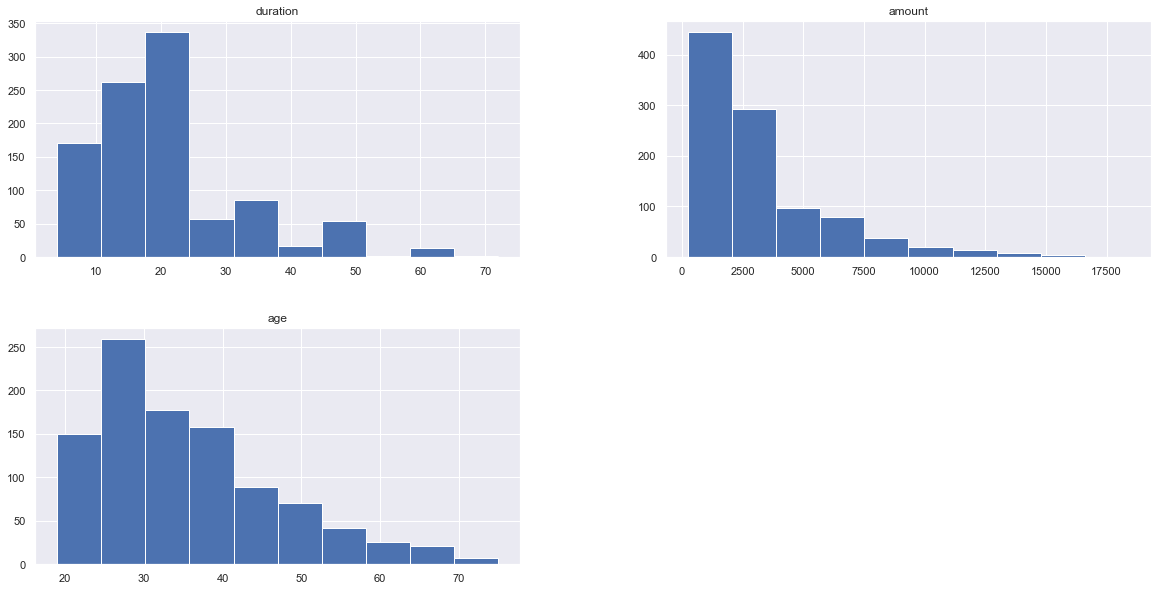

In [ ]:
sns.set(rc={'figure.figsize':(20,10)})

df_numeric = df[quantitative_features].copy()
df_numeric.hist(bins=10)

plt.show()


En los histogramas anteriores podemos observar que las variables son diferentes en escala. Por ejemplo la variable del monto del crédito(amount) tiene valores en la escala 250-20,000 y la variable de la duración del crédito (duration) tiene valores en la escala 4-70.

Como las columnas son diferentes en escala, las vamos a estandarizar para tener una escala común al construir el modelo de aprendizaje automático utilizando **```StandardScaler()```**.

In [ ]:
quantitative_transformer = Pipeline(
    steps=[("imputer_quantitative", SimpleImputer(strategy='mean')), ('scaler', StandardScaler())]
)


### **c) Aplica la transformación One-Hot encoding a las variables de entrada de tipo categórico y binaria. En particular, justifica por qué una variable binaria requeriría que se le aplique la transformación one-hot encoding. Por el momento dejar las variables ordinales sin transformar.**

In [ ]:
categorical_transformer = Pipeline(
    [('imputer_categorical', SimpleImputer(strategy='most_frequent')), ('onehot', OneHotEncoder(handle_unknown = 'ignore'))]
)

One hot encoding permite que la representación de datos categóricos sea más expresiva.

Muchos algoritmos de aprendizaje automático no pueden trabajar directamente con datos categóricos. Las categorías deben convertirse en números. Esto es necesario para las variables de entrada y salida que son categóricas.

Podríamos usar una codificación de enteros directamente, reescalada donde sea necesario. Esto puede funcionar para problemas en los que existe una relación ordinal natural entre las categorías y, a su vez, los valores enteros, como las etiquetas de temperatura "fría", "tibia" y "caliente".

Puede haber problemas cuando no hay una relación ordinal y permitir que la representación se apoye en dicha relación podría ser perjudicial para aprender a resolver el problema. Un ejemplo podría ser las etiquetas 'perro' y 'gato'

Cuando se utiliza one hot encoding para la variable de salida, puede ofrecer un conjunto de predicciones más matizado que una sola etiqueta.

**El Pre-Procesador**

Se crea el objeto Pre-procesador (Instancia de ColumnTransformer) que se utilizará más adelante como parte del Pipeline. ColumnTransformer toma una lista, que contiene tuplas de las transformaciones que deseamos realizar en las diferentes columnas.

In [ ]:
preprocessor = ColumnTransformer(
        transformers = [
            ('ordinal_transformer', ordinal_transformer, ordinal_features),
            ('quantitative_transformer', quantitative_transformer, quantitative_features),
            ('categorical_transformer', categorical_transformer, categorical_features)
        ],
    remainder='passthrough' #Todas las columnas restantes que no se especificaron transformers se pasarán automáticamente
)

# **Ejercicio-4.**

Llevarás un entrenamiento usando validación cruzada entre los siguientes tres modelos de aprendizaje automático: Regresión Logística, Árbol de Decisión y Bosque Aleatorio. Deberás llevar a cabo el entrenamiento de los tres de manera conjunta usando un ciclo FOR. Recuerda aplicar las transformaciones que definiste en tu Pipeline. El entrenamiento debe ser con las siguientes características:

1. Usa los parámetros predeterminados de cada modelo.

2. En cada iteración deben calcularse todas las siguientes métricas: accuracy, precision, recall, f1-score y Gmean. Todas estas métricas deben ser funciones que tú mismo debes definir (Es decir, no usar las funciones de dichas métricas que te proporciona scikit-learn. Sin embargo, sí puedes usar la información regresada por el método confusion_matrix() de scikit-learn para definir las métricas).

3. Usar validación cruzada estratificada con 5 particiones y con 3 repeticiones.

4. Imprimir el valor de todas estas métricas, tanto para los datos de entrenamiento, como para los de validación. Así como los diagramas de caja y bigotes de los tres modelos con la métrica “recall”. ¿Alguno de los modelos está subentrenado o sobreentrenado? Justifica tu respuesta.

5. En particular obtengamos algunas de las llamadas curvas de aprendizaje para algunos de estos casos. En dada gráfico debes incluir tus comentarios sobre el modelo generado:
 1. Obtener las curvas de aprendizaje (learning_curve) en la cual se va incrementando el tamaño de la muestra para el modelo de regresión Logística con su hiperparámetros predeterminados. Utilizar al menos 20 puntos en la partición de los conjuntos de entrenamiento y la métrica “f1-score”, como evaluación del desempeño de dicha función “learning_curve()”.
 
 2. Obtener las curvas de validación (validation_curve) en la cual se va incrementando la complejidad del hiperparámetro “max_depth” para el modelo de árbol de decisión con sus hiperparámetros predeterminados. Utilizar valores de máxima profundidad desde 1 hasta 20 y con la métrica “f1-score” para la evaluación del desempeño del modelo.}

 3. Obtener las curvas de aprendizaje (learning_curve) en la cual se va incrementando el tamaño de la muestra para el modelo de regresión bosque aleatorio (random forest) con su hiperparámetros predeterminados. Utilizar al menos 20 puntos en la partición de los conjuntos de entrenamiento y la métrica “recall”, como evaluación del desempeño del modelo.

### **a) Usamos los parámetros prederteminados de cada modelo para Regresión Logística, Árbol de Decisión y Bosque Aleatorio**

In [ ]:
def get_modelos():
  
  modelos, nombres = list(), list()

  # LR - Regresión Logística:
  modelos.append(LogisticRegression(max_iter=1000))
  nombres.append('LogisticRegression')

  # DT - Árbol de Decisión:
  modelos.append(DecisionTreeClassifier())
  nombres.append('DecisionTreeClassifier')

  # RF - Bosque Aleatorio:  
  modelos.append(RandomForestClassifier())
  nombres.append('RandomForestClassifier')

  return modelos, nombres


### **b) Se definen las funciones para las métricas accuracy, precision, recall, f1-score y Gmean**

In [ ]:
def mi_accuracy(yreal, ypred):

  vn, fp, fn, vp = confusion_matrix(yreal, ypred).ravel()
  
  return (vp + vn) / (vp + vn + fp + fn)


In [ ]:
def mi_precision(yreal, ypred):

  vn, fp, fn, vp = confusion_matrix(yreal, ypred).ravel()
  
  return vp / (vp + fp)


In [ ]:
def mi_recall(yreal, ypred):

  vn, fp, fn, vp = confusion_matrix(yreal, ypred).ravel()
  
  return vp / (vp + fn)


In [ ]:
def mi_f1_score(yreal, ypred):

  vn, fp, fn, vp = confusion_matrix(yreal, ypred).ravel()
  
  return (2 * vp) / (2 * vp + fp + fn)


In [ ]:
def mi_gmean(yreal, ypred):

    vn, fp, fn, vp = confusion_matrix(yreal, ypred).ravel()

    recall = vp / (vp + fn)
    especificidad = vn / (vn + fp)

    gmean = np.sqrt(recall * especificidad)

    return gmean


In [ ]:
metrics = {'accuracy' : make_scorer(mi_accuracy),
           'precision': make_scorer(mi_precision),
           'recall'   : make_scorer(mi_recall),
           'f1_score' : make_scorer(mi_f1_score),
           'gmean'    : make_scorer(mi_gmean)}

Ocupamos la función de la práctica de Clases balanceadas y no balanceadas para graficar la matriz de confusión y validar las métricas definidas en el paso anterior.

In [ ]:
def mi_cm(yreal, ypred):

  cm = confusion_matrix(yreal, ypred)

  txt = ['Verdaderos Negativos','Falsos Positivos','Falsos Negativos','Verdaderos Positivos']
  vf = [ '( VN )', '( FP )', '( FN )', '( VP )']
  frecuencia = ["{0:0.0f}".format(value) for value in cm.flatten()]
  porcentaje = ["{0:.1%}".format(value) for value in cm.flatten()/np.sum(cm)]

  labels = [f"{v1}\n{v2}\n{v3}\n{v4}" for v1, v2, v3, v4 in zip(txt,vf, frecuencia,porcentaje)]
  labels = np.asarray(labels).reshape(2,2)

  plt.figure(figsize=(6,4))
  ax = sns.heatmap(cm, annot=labels, fmt='', cmap='Spectral', cbar=False)
  ax.set(ylabel="Etiquetas Reales", xlabel="Etiquetas de Predicción")
  plt.show()


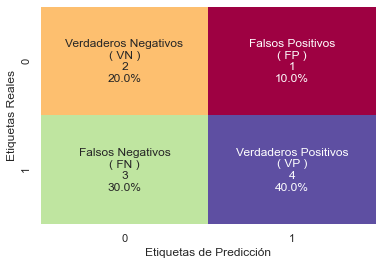

Valor del accuracy: 0.6000
Valor del precisión: 0.8000
Valor del recall: 0.5714
Valor del f1-score: 0.6667
Valor del g-mean: 0.6172


In [ ]:
#Este código es solo para validar que se programaron bien las funciones
yreal = np.array([1, 1, 1, 1, 1, 1, 1, 0, 0, 0])
ypred = np.array([1, 1, 1, 1, 0, 0, 0, 0, 0, 1])

mi_cm(yreal, ypred)

print("Valor del accuracy: %.4f" % mi_accuracy(yreal, ypred))
print("Valor del precisión: %.4f" % mi_precision(yreal, ypred))
print("Valor del recall: %.4f" % mi_recall(yreal, ypred))
print("Valor del f1-score: %.4f" % mi_f1_score(yreal, ypred))
print("Valor del g-mean: %.4f" % mi_gmean(yreal, ypred))



### **c) Ejecutar el modelo usando validación cruzada estratificada con 5 particiones y con 3 repeticiones.**

In [ ]:
modelos, nombres = get_modelos()
results_train = list()
results_test = list()

for modelo in modelos:

    pipe = Pipeline(steps = [('ct', preprocessor), ('m', modelo)]) #preprocessor fue definido previamente

    kfold = RepeatedStratifiedKFold(n_splits = 5, n_repeats = 3, random_state = 1)
    
    scores_train = cross_validate(pipe, 
                                  X_train, Y_train,
                                  scoring = metrics, #definida anteriormente
                                  cv = kfold)
    
    results_train.append(scores_train)
    
    
    scores_test = cross_validate(pipe, 
                                  X_test, Y_test,
                                  scoring = metrics, #definida anteriormente
                                  cv = kfold)
    
    results_test.append(scores_test)

### **d) Imprimir el valor de todas estas métricas, tanto para los datos de entrenamiento, como para los de validación. Así como los diagramas de caja y bigotes de los tres modelos con la métrica “recall”. ¿Alguno de los modelos está subentrenado o sobreentrenado? Justifica tu respuesta.**

In [ ]:
for i in range(len(modelos)):
    print('********** %s **********\n' % nombres[i])
    
    print("Train Data")
    print('mean Accuracy: %.3f (%.4f)\nmean Precision: %.3f (%.4f)\nmean Recall: %.3f (%.4f)\nmean F1-score: %.3f (%.4f)\nmean Gmean: %.3f (%.4f)\n' % (
                                                                          np.mean(results_train[i]['test_accuracy']),
                                                                          np.std(results_train[i]['test_accuracy']), 
                                                                          np.mean(results_train[i]['test_precision']),
                                                                          np.std(results_train[i]['test_precision']),
                                                                          np.mean(results_train[i]['test_recall']),
                                                                          np.std(results_train[i]['test_recall']),
                                                                          np.mean(results_train[i]['test_f1_score']),
                                                                          np.std(results_train[i]['test_f1_score']),
                                                                          np.mean(results_train[i]['test_gmean']),
                                                                          np.std(results_train[i]['test_gmean']),  
                                                                          ))
    
    print("Test Data")
    print('mean Accuracy: %.3f (%.4f)\nmean Precision: %.3f (%.4f)\nmean Recall: %.3f (%.4f)\nmean F1-score: %.3f (%.4f)\nmean Gmean: %.3f (%.4f)\n' % (
                                                                          np.mean(results_test[i]['test_accuracy']),
                                                                          np.std(results_test[i]['test_accuracy']), 
                                                                          np.mean(results_test[i]['test_precision']),
                                                                          np.std(results_test[i]['test_precision']),
                                                                          np.mean(results_test[i]['test_recall']),
                                                                          np.std(results_test[i]['test_recall']),
                                                                          np.mean(results_test[i]['test_f1_score']),
                                                                          np.std(results_test[i]['test_f1_score']),
                                                                          np.mean(results_test[i]['test_gmean']),
                                                                          np.std(results_test[i]['test_gmean']),  
                                                                          ))

********** LogisticRegression **********

Train Data
mean Accuracy: 0.762 (0.0305)
mean Precision: 0.801 (0.0204)
mean Recall: 0.876 (0.0336)
mean F1-score: 0.837 (0.0220)
mean Gmean: 0.661 (0.0430)

Test Data
mean Accuracy: 0.669 (0.0523)
mean Precision: 0.744 (0.0262)
mean Recall: 0.825 (0.0815)
mean F1-score: 0.780 (0.0416)
mean Gmean: 0.458 (0.0930)

********** DecisionTreeClassifier **********

Train Data
mean Accuracy: 0.696 (0.0257)
mean Precision: 0.784 (0.0152)
mean Recall: 0.779 (0.0351)
mean F1-score: 0.781 (0.0215)
mean Gmean: 0.627 (0.0294)

Test Data
mean Accuracy: 0.656 (0.0663)
mean Precision: 0.778 (0.0639)
mean Recall: 0.741 (0.0985)
mean F1-score: 0.753 (0.0545)
mean Gmean: 0.553 (0.1057)

********** RandomForestClassifier **********

Train Data
mean Accuracy: 0.764 (0.0257)
mean Precision: 0.792 (0.0171)
mean Recall: 0.898 (0.0296)
mean F1-score: 0.841 (0.0179)
mean Gmean: 0.639 (0.0413)

Test Data
mean Accuracy: 0.724 (0.0354)
mean Precision: 0.740 (0.0295)
mean Re

Se crean lo diagramas de caja y bigotes (Box-Plot Train Set)

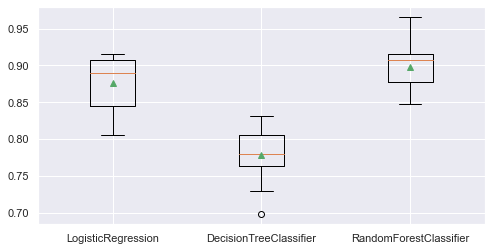

In [ ]:
sns.set(rc={'figure.figsize':(8,4)})

bpRecall = list()
for i in range(len(results_train)):
  rr = results_train[i]['test_recall']
  bpRecall.append(rr)

plt.boxplot(bpRecall, labels=nombres, showmeans=True)
plt.show()

plt.show()

Se crean lo diagramas de caja y bigotes (Box-Plot Test Set)

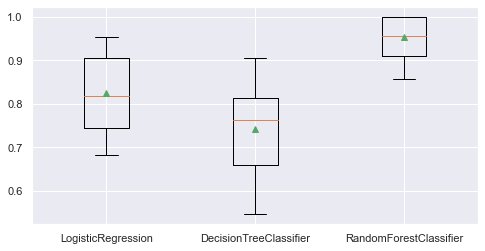

In [ ]:
sns.set(rc={'figure.figsize':(8,4)})

bpRecall = list()
for i in range(len(results_train)):
  rr = results_test[i]['test_recall']
  bpRecall.append(rr)

plt.boxplot(bpRecall, labels=nombres, showmeans=True)
plt.show()

plt.show()

**Conclusiones:**
* Para este caso podemos observar que nuestra precisión en los 3 modelos tanto en el conjunto de entrenamiento como en el de validación es bastante cercana, lo cual indica que los modelos en alrededor de un 75% aciertan las predicciones y un 25% se equivocan, aunque este valor no es del todo bueno, no aplicaría para que el modelo estuviera subentrenado.
* Observando las Box-Plot con la metrica recall y los resultados del conjunto de entrenamiento, observamos un mejor desempeño con el modelo RFC, seguido del modelo de regresión logistica, lo mismo que con el conjunto de prueba, al cual podemos observar que se adicionan ciertos outliers en los modelos de DT y RFC, pero que en general mantienen resultados consistentes. 


### **e) En particular obtengamos algunas de las llamadas curvas de aprendizaje para algunos de estos casos. En dada gráfico debes incluir tus comentarios sobre el modelo generado:**



Debido a que se van a estar analizando las curvas de aprendizaje vamos a reutilizar la función **```mi_LearningCurvePlot```** de la práctica de Curvas de aprendizaje.



In [ ]:
def mi_CurvePlot(train_sizes_param_range, train_scores, val_scores, title, xlabel, ylabel):

    # Argumentos de entrada de la función mi_CurvePlot:
    #      train_sizes_param_range : número de observaciones en el conjunto de entrenamiento o parámetros del modelo.
    #      train_scores : Exactitud de cada partición en el proceso de Validación-Cruzada (VC) en los datos de entrenamiento.
    #                     La dimensión de este conjunto es (pxq) 
    #                                     donde p="número de particiones de manera incremental del conjunto de entrenamiento".
    #                                           q="número de particiones de VC" * "número de repeticiones de VC con RepitedStratifiedCV"
    #      val_scores : Exactitud de cada partición en el proceso de Validación-Cruzada en los datos de validación.
    #                   Es de la misma dimensión que los train_scores. 
    #      title: Texto a mostrar cómo título
    #      xlabel: Texto a mostrar en el eje x
    #      ylabel: Texto a mostrar en el eje y
    # Output: la salida es el gráfico con las curvas de aprendizaje.

    # Obtenemos los promedios y desviaciones estándar de cada renglón de los resultados de entrenamiento y validación
    # La dimensión de cada uno es p="número de particiones de manera incremental del conjunto de entrenamiento".
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    val_mean = np.mean(val_scores, axis=1)
    val_std = np.std(val_scores, axis=1)

    # Graficamos las curvas de aprendizaje incluyendo una región indicando la desviación estándar.
    plt.figure(figsize=(7,6))
    plt.plot(train_sizes_param_range, train_mean, color='blue', marker='o', markersize=5, label='Training')
    plt.fill_between(train_sizes_param_range, train_mean + train_std, train_mean - train_std, alpha=0.1, color='blue')
    
    plt.plot(train_sizes_param_range, val_mean, color='red', marker='+', markersize=5, linestyle='--', label='Validation')
    plt.fill_between(train_sizes_param_range, val_mean + val_std, val_mean - val_std, alpha=0.1, color='red')
    
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid()
    plt.legend(loc='lower left')
    plt.show()

#### e.i) Obtener las curvas de aprendizaje (learning_curve) en la cual se va incrementando el tamaño de la muestra para el **modelo de regresión logística** con su hiperparámetros predeterminados. Utilizar al menos 20 puntos en la partición de los conjuntos de entrenamiento y la métrica “f1-score”, como evaluación del desempeño de dicha función “learning_curve()”.

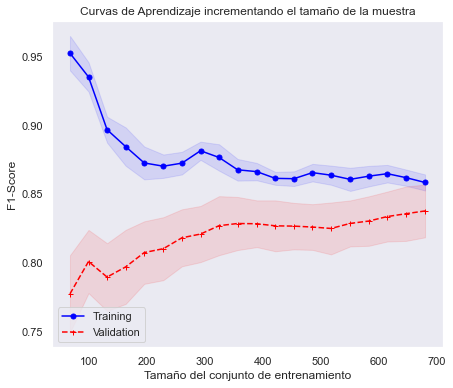

In [ ]:
#Usa los parámetros predeterminados del modelo.
modelo = LogisticRegression(max_iter=10000)

#Definimos el pipeline con la imputación, transformación y escalamiento
pipe = Pipeline(steps = [('ct', preprocessor), ('m', modelo)])

#Genera un arreglo con los 20 valores de los tamaños de muestra
train_sz = np.linspace(0.1, 1, num=20)

#Aplica validación cruzada estratificada y con repeticiones
kfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=7)

tr_sizes, tr_scores, val_scores = learning_curve(estimator = pipe,
                                                 X = X_train, y = Y_train, 
                                                 train_sizes = train_sz, 
                                                 cv = kfold, 
                                                 scoring = make_scorer(mi_f1_score), 
                                                 random_state = 1,
                                                 n_jobs=-1)

# Obtenemos el gráfico con las curvas de aprendizaje:
mi_CurvePlot(tr_sizes, tr_scores, val_scores, 
             title = 'Curvas de Aprendizaje incrementando el tamaño de la muestra', 
             xlabel = 'Tamaño del conjunto de entrenamiento',
             ylabel= 'F1-Score'     
             )

**Conclusiones:** Al incrementar las muestras obtenemos una mejora evidente en el desempeño del modelo, donde se observa que tanto el conjunto de entrenamiento como el de validación estan en sincronia, lo cual indicaría que el modelo a lo largo del tiempo sigue aprendiendo y llegarían ambas curvas a converger posiblemente en un valor de 0.85 

#### e.ii) Obtener las curvas de validación (validation_curve) en la cual se va incrementando la complejidad del hiperparámetro “max_depth” para el **modelo de árbol de decisión** con sus hiperparámetros predeterminados. Utilizar valores de máxima profundidad desde 1 hasta 20 y con la métrica “f1-score” para la evaluación del desempeño del modelo.

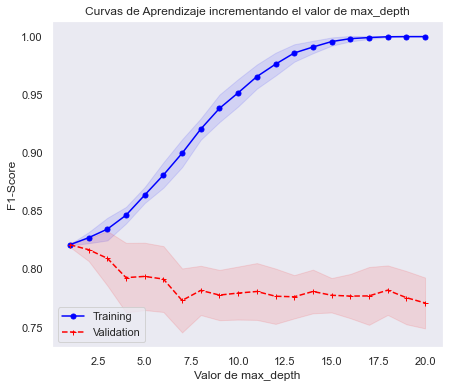

In [ ]:
#Usa los parámetros predeterminados del modelo.
modelo = DecisionTreeClassifier()

#Para usar validation_curve primero realizamos la imputación, transformación, escalamiento
#y después lo pasamos cómo parámetros ya transformados
X_train_transformed = preprocessor.fit_transform(X_train)

#Genera un arreglo con los 20 valores de los tamaños de muestra
mi_param_range = np.linspace(1, 20, num=20)

#Aplica validación cruzada estratificada y con repeticiones
kfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=7)

tr_scores, val_scores = validation_curve(estimator = modelo,
                                         X = X_train_transformed, y = Y_train,
                                         param_name = "max_depth",
                                         param_range = mi_param_range,
                                         cv = kfold,
                                         scoring = make_scorer(mi_f1_score),
                                         n_jobs=-1)

# Obtenemos el gráfico con las curvas de aprendizaje:
mi_CurvePlot(mi_param_range, tr_scores, val_scores, 
             title = 'Curvas de Aprendizaje incrementando el valor de max_depth', 
             xlabel = 'Valor de max_depth',
             ylabel= 'F1-Score'     
            )

Los **Árboles de Decisión** pueden ser muchas veces una herramienta muy precisa, pero también con mucha tendencia al sobreajuste.

El gráfico que acabamos de construir se muestra la precisión del modelo en función de su complejidad al aumentar la profundidad(max_depth). En este caso podemos ver que el punto con mayor precisión lo obtenemos con un nivel de profundidad de aproximadamente 5 nodos a partir de allí el modelo pierde en generalización y comienza a estar sobreajustado.

#### e.iii) Obtener las curvas de aprendizaje (learning_curve) en la cual se va incrementando el tamaño de la muestra para el **modelo de regresión bosque aleatorio (random forest)** con su hiperparámetros predeterminados. Utilizar al menos 20 puntos en la partición de los conjuntos de entrenamiento y la métrica “recall”, como evaluación del desempeño del modelo.

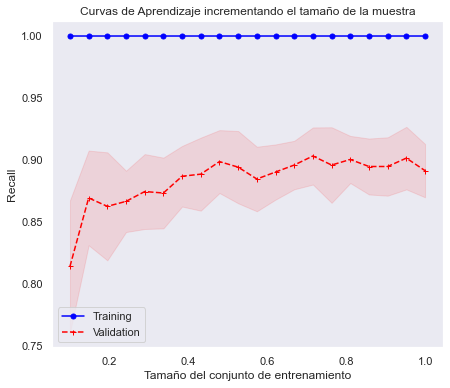

In [ ]:
#Usa los parámetros predeterminados del modelo.
modelo = RandomForestClassifier()

#Definimos el pipeline con la imputación, transformación y escalamiento
pipe = Pipeline(steps = [('ct', preprocessor), ('m', modelo)])

#Genera un arreglo con los 20 valores de los tamaños de muestra
train_sz = np.linspace(0.1, 1, num=20)

#Aplica validación cruzada estratificada y con repeticiones
kfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=7)

tr_sizes, tr_scores, val_scores = learning_curve(estimator = pipe,
                                                   X = X_train, y = Y_train, 
                                                   train_sizes = train_sz, 
                                                   cv = kfold, 
                                                   scoring = make_scorer(mi_recall), 
                                                   random_state = 1,
                                                   n_jobs=-1)

# Obtenemos el gráfico con las curvas de aprendizaje:
mi_CurvePlot(train_sz, tr_scores, val_scores, 
             title = 'Curvas de Aprendizaje incrementando el tamaño de la muestra', 
             xlabel = 'Tamaño del conjunto de entrenamiento',
             ylabel= 'Recall'     
            )


**Conclusiones:** Al aumentar tanto el tamaño de la muestra nuestro modelo se sobre entrena, evidenciando en la curva de entrenamiento una constante como si "hubiera memorizado los datos", respecto a la curva de validación que aunque su valor incrementa a medida que aumenta el conjunto es evidente un sesgo.

# **Ejercicio-5.**

Finalmente veamos la manera de mejorar los valores de los hiperparámetros de cada modelo, así como el problema del sobreentrenamiento de algunos de ellos. Para ello deberás usar el método GridSearchCV() de scikit-learn. Recuerda que este método hace una búsqueda de los mejores hiperparámetros de un modelo mediante el llamada formato de malla y aplicando validación cruzada. En cada caso puedes incrementar el máximo de iteraciones,”max_iter” para que tengas la convergencia adecuada para todas las combinaciones en cada modelo. Recuerda también aplicar las transformaciones que definiste en tu Pipeline. Para fines de este ejercicio se ha seleccionado para cada modelo una métrica diferente, que permita irte familiarizando con ellas. Puedes consultar su documentación de GridSearchCV en la siguiente liga:

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

1. Para el modelo de regresión logística realizar el entrenamiento buscando sus mejores hiperparámetros con GridSearchCV(). Los hiperparámetros que debes incluir en su búsqueda deben ser al menos los siguientes: C, solver, class_weight y penalty. En este caso deberás usar la métrica (scoring) “f1-score”. Imprime la mejor combinación de parámetros obtenidos, así como el valor del mejor desempeño (score) obtenido con la métrica f1. ¿Cuál es la utilidad de la métrica “f1-score”? Incluye tus conclusiones. NOTA: Toma en cuenta que no todas las combinaciones de “solver” y “penalty” son posibles, para que lo tomes en cuenta al momento de realizar la búsqueda. Revisa la documentación.

2.   Con los mejores valores de los hiperparámetros encontrados con la métrica “f1-score” para el modelo de regresión logística, obtener las curvas de aprendizaje (learning curve), incrementando el tamaño del conjunto de entrenamiento al menos 20 veces. Si lo crees adecuado, puedes hacer los ajustes que consideres adecuados para mejorar el resultado y evitar el sobreentrenamiento o el subentrenamiento.

3.   Para el modelo de árbol de decisión (decision tree) realizar el entrenamiento buscando sus mejores hiperparámetros con GridSearchCV(). Los hiperparámetros que debes incluir en su búsqueda deben ser al menos los siguientes: ccp_alpha, criterion, max_depth, min_samples_split y class_weight. En este caso deberás usar la métrica (scoring) “precision”. Imprime la mejor combinación de parámetros obtenidos, así como el valor del mejor desempeño (score) obtenido con la métrica “precision”. ¿Cuál es la utilidad de la métrica “precision”? Incluye tus conclusiones.

4.   Con los mejores valores de los hiperparámetros encontrados con la métrica “precision” para el modelo de árbol de decisión, obtener las curvas de aprendizaje (learning curve), incrementando el tamaño del conjunto de entrenamiento al menos 20 veces. Si lo crees adecuado, puedes hacer los ajustes que consideres adecuados para mejorar el resultado y evitar el sobreentrenamiento o el subentrenamiento.

5.   Para el modelo de bosque aleatorio (random forest) realizar el entrenamiento buscando sus mejores hiperparámetros con GridSearchCV(). Los hiperparámetros que debes incluir en su búsqueda deben ser al menos los siguientes: ccp_alpha, criterion, max_depth, min_samples_split y class_weight. En este caso deberás usar la métrica (scoring) “recall”. Imprime la mejor combinación de parámetros obtenidos, así como el valor del mejor desempeño (score) obtenido con la métrica “recall”. ¿Cuál es la utilidad de la métrica “recall”? Incluye tus conclusiones. NOTA: Toma en cuenta que el método de random forest pude tardar varios minutos en llevar a cabo

6.   Con los mejores valores de los hiperparámetros encontrados con la métrica “recall” para el modelo de bosque aleatorio, obtener las curvas de validación (validation curve), incrementando la complejidad del modelo a través del hiperparámetro “max_depth” con al menos 10 valores. Si lo crees adecuado, puedes hacer los ajustes que consideres adecuados para mejorar el resultado y evitar el sobreentrenamiento o el subentrenamiento.

### **a) Grid Search para el modelo de Regresión Logística**

In [ ]:
#Los valores de penalty sportadas por solver son: 
#‘newton-cg’ - [‘l2’, ‘none’]
#‘lbfgs’ - [‘l2’, ‘none’]
#‘liblinear’ - [‘l1’, ‘l2’]
#‘sag’ - [‘l2’, ‘none’]
#‘saga’ - [‘elasticnet’, ‘l1’, ‘l2’, ‘none’]

modelo = LogisticRegression(max_iter=10000)

dicc_grid = {'C':[0.0001,0.01,0.1,1.0,10.,100.],
             'class_weight':[None, 'balanced'],
             'solver':['newton-cg','lbfgs','liblinear','sag', 'saga'],
             'penalty':['l2']
             }

#Aplica validación cruzada estratificada y con repeticiones
kfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=7)

# Transformamos los datos de entrada con la imputación, transformación y escalamiento
Xx = preprocessor.fit_transform(X_train)

grid = GridSearchCV(estimator=modelo, 
                    param_grid=dicc_grid, 
                    cv=kfold, 
                    scoring=make_scorer(mi_f1_score),
                    n_jobs=-1)

# Llevamos a cabo el proceso de etrenamiento con validación-cruzada y búsqueda de malla.
grid.fit(Xx, np.ravel(Y_train))

print('Mejor valor de exactitud obtenido con la mejor combinación:', grid.best_score_)
print('Mejor combinación de valores encontrados de los hiperparámetros:', grid.best_params_)
print('Métrica utilizada:', grid.scoring)

Mejor valor de exactitud obtenido con la mejor combinación: 0.8404432211383555
Mejor combinación de valores encontrados de los hiperparámetros: {'C': 0.1, 'class_weight': None, 'penalty': 'l2', 'solver': 'liblinear'}
Métrica utilizada: make_scorer(mi_f1_score)


### **b) Modelo de Regresión Logística con los mejores valores de los hipermparámetros**

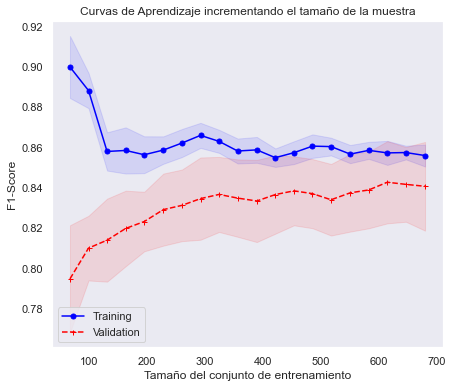

In [ ]:
#Usamos los parámetros obtenidos en el paso anterior.
modelo = LogisticRegression(max_iter=10000, C=0.1, class_weight=None, penalty='l2', solver='liblinear')

#Definimos el pipeline como con la imputación, transformación y escalamiento
pipe = Pipeline(steps = [('ct', preprocessor), ('m', modelo)])

#Genera un arreglo con los 20 valores de los tamaños de muestra
train_sz = np.linspace(0.1, 1, num=20)

#Aplica validación cruzada estratificada y con repeticiones
kfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=7)

tr_sizes, tr_scores, val_scores = learning_curve(estimator = pipe,
                                                 X = X_train, y = Y_train, 
                                                 train_sizes = train_sz, 
                                                 cv = kfold, 
                                                 scoring = make_scorer(mi_f1_score), 
                                                 random_state = 1,
                                                 n_jobs=-1)

# Obtenemos el gráfico con las curvas de aprendizaje:
mi_CurvePlot(tr_sizes, tr_scores, val_scores, 
             title = 'Curvas de Aprendizaje incrementando el tamaño de la muestra', 
             xlabel = 'Tamaño del conjunto de entrenamiento',
             ylabel= 'F1-Score'     
             )

**Conclusiones:** Aquí observamos que respecto a la prueba anterior el desempeño del modelo sigue siendo coherente respecto sus curvas de entrenamiento y validación 

### **c) Grid Search para el modelo de Árbol de Decisión**

In [ ]:
#Para quitar los mensajes de funciones deprecadas en este caso quitamos los warnings
import warnings
warnings.filterwarnings("ignore")

modelo = DecisionTreeClassifier()

dicc_grid = {'ccp_alpha':np.linspace(1, 20, 20),
             'criterion':['gini', 'entropy', 'log_loss'],
             'max_depth':np.linspace(1, 20, 20),
             'min_samples_split':[1, 2, 3, 4, 5],
             'class_weight':[None, 'balanced']
             }


#Aplica validación cruzada estratificada y con repeticiones
kfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=7)

# Transformamos los datos de entrada con la imputación, transformación y escalamiento
Xx = preprocessor.fit_transform(X_train)

grid = GridSearchCV(estimator=modelo, 
                    param_grid=dicc_grid, 
                    cv=kfold, 
                    scoring=make_scorer(mi_precision),
                    n_jobs=-1)

# Llevamos a cabo el proceso de etrenamiento con validación-cruzada y búsqueda de malla.
grid.fit(Xx, np.ravel(Y_train))

print('Mejor valor de exactitud obtenido con la mejor combinación:', grid.best_score_)
print('Mejor combinación de valores encontrados de los hiperparámetros:', grid.best_params_)
print('Métrica utilizada:', grid.scoring)


Mejor valor de exactitud obtenido con la mejor combinación: 0.6964705882352941
Mejor combinación de valores encontrados de los hiperparámetros: {'ccp_alpha': 1.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 1.0, 'min_samples_split': 2}
Métrica utilizada: make_scorer(mi_precision)


### **d) Modelo de Árbol de Decisión con los mejores valores de los hipermparámetros**

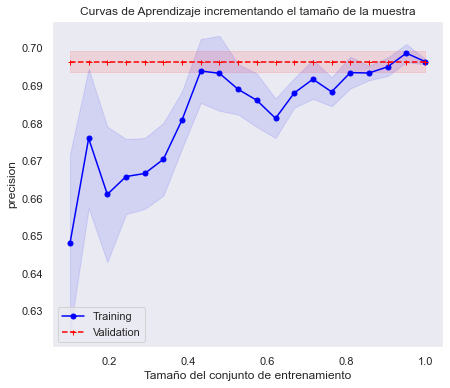

In [ ]:
#Usa los parámetros obtenidos en el paso anterior.
modelo = DecisionTreeClassifier(ccp_alpha=1.0, criterion='gini', max_depth=1.0, min_samples_split=2, class_weight=None)

#Definimos el pipeline como con la imputación, transformación y escalamiento
pipe = Pipeline(steps = [('ct', preprocessor), ('m', modelo)])

#Genera un arreglo con los 20 valores de los tamaños de muestra
train_sz = np.linspace(0.1, 1, num=20)

#Aplica validación cruzada estratificada y con repeticiones
kfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=7)

tr_sizes, tr_scores, val_scores = learning_curve(estimator = pipe,
                                                   X = X_train, y = Y_train, 
                                                   train_sizes = train_sz, 
                                                   cv = kfold, 
                                                   scoring = make_scorer(mi_precision), 
                                                   random_state = 1,
                                                   n_jobs=-1)
# Obtenemos el gráfico con las curvas de aprendizaje:
mi_CurvePlot(train_sz, tr_scores, val_scores, 
             title = 'Curvas de Aprendizaje incrementando el tamaño de la muestra', 
             xlabel = 'Tamaño del conjunto de entrenamiento',
             ylabel= 'precision'     
            )

**Conclusiones:** Observamos que la curva de aprendizaje varía a lo largo del tamaño del conjunto de entrenamiento, pero su curva de validación se queda constante en 0.698

### **e) Grid Search para el modelo de Bosque Aleatorio**

In [ ]:
modelo = RandomForestClassifier()

#Hay que ampliar la lista de ccp_alpha, max_depth y min_samples_split, por el momento la recorté para que no tardara mucho el algoritmo  
dicc_grid = {'ccp_alpha':np.linspace(1, 5, 5),
             'criterion':['gini', 'entropy', 'log_loss'],
             'max_depth':np.linspace(1, 5, 5),
             'min_samples_split':[1, 2],
             'class_weight':[None, 'balanced']
             }


#Aplica validación cruzada estratificada y con repeticiones
kfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=7)

# Transformamos los datos de entrada con la imputación, transformación y escalamiento
Xx = preprocessor.fit_transform(X_train)

grid = GridSearchCV(estimator=modelo, 
                    param_grid=dicc_grid, 
                    cv=kfold, 
                    scoring=make_scorer(mi_recall),
                    n_jobs=-1)

# Llevamos a cabo el proceso de etrenamiento con validación-cruzada y búsqueda de malla.
grid.fit(Xx, np.ravel(Y_train))

print('Mejor valor de exactitud obtenido con la mejor combinación:', grid.best_score_)
print('Mejor combinación de valores encontrados de los hiperparámetros:', grid.best_params_)
print('Métrica utilizada:', grid.scoring)


Mejor valor de exactitud obtenido con la mejor combinación: 1.0
Mejor combinación de valores encontrados de los hiperparámetros: {'ccp_alpha': 1.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 1.0, 'min_samples_split': 2}
Métrica utilizada: make_scorer(mi_recall)


### **f) Modelo de Bosque Aleatorio con los mejores valores de los hipermparámetros**

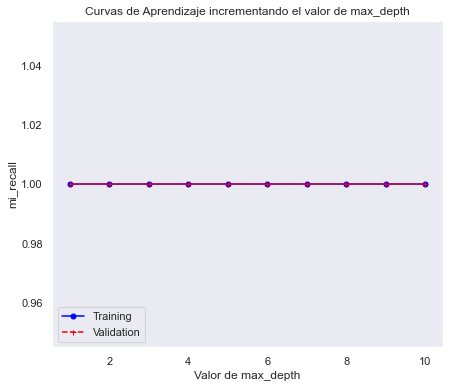

In [ ]:
#Usa los parámetros obtenidos en el paso anterior.
modelo = RandomForestClassifier(ccp_alpha= 1.0, class_weight=None, criterion='gini', max_depth=1.0, min_samples_split=2)

#Para usar validation_curve primero realizamos la imputación, transformación, escalamiento
#y después lo pasamos cómo parámetros ya transformados
X_train_transformed = preprocessor.fit_transform(X_train)

#Genera un arreglo con los 20 valores de los tamaños de muestra
mi_param_range = np.linspace(1, 10, num=10)

#Aplica validación cruzada estratificada y con repeticiones
kfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=7)

tr_scores, val_scores = validation_curve(estimator = modelo,
                                         X = X_train_transformed, y = Y_train,
                                         param_name = "max_depth",
                                         param_range = mi_param_range,
                                         cv = kfold,
                                         scoring = make_scorer(mi_recall),
                                         n_jobs=-1)

# Obtenemos el gráfico con las curvas de aprendizaje:
mi_CurvePlot(mi_param_range, tr_scores, val_scores, 
             title = 'Curvas de Aprendizaje incrementando el valor de max_depth', 
             xlabel = 'Valor de max_depth',
             ylabel= 'mi_recall'     
            )

*  En este resultado podemos observar que el modelo estaría aprendiendo en su primer nodo y de ahí en adelante se queda estable en dicho valor de predicción. 

# **Ejercicio-6.**

Para cada uno de estos tres modelos, con las métricas que se consideraron en cada caso y usando el conjunto de Prueba que no has utilizado hasta ahora, obtener los modelos finales como se te indica a continuación. Deberás usar además como conjunto de entrenamiento el llamado modelo de entrenamiento “aumentado” que consiste en las datos que estuviste utilizando para entrenamiento y validación:

1. Obtener el modelo de regresión logística con los mejores parámetros que hayas encontrado con la métrica f1-score utilizada. Imprimir el valor de dicha métrica e incluye tus conclusiones finales para este caso. 

2. Obtener el modelo de árbol de decisiones con los mejores parámetros que hayas encontrado con la métrica “precision” utilizada. Imprimir el valor de dicha métrica e incluye tus conclusiones finales para este caso.Incluir un gráfico del árbol de decisión final obtenido.

3. Obtener el modelo de bosque aleatorio con los mejores parámetros que hayas encontrado con la métrica “recall” utilizada. Imprimir el valor de dicha métrica e incluye tus conclusiones finales para este caso.

### **a) Modelo de Regresión Logística con los mejores parámetros**

Exactitud con datos de Validación: 73.3%


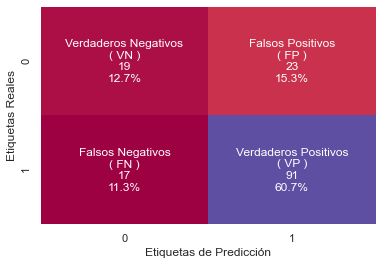

Valor del f1_score: 0.8198


In [ ]:
#Primero realizamos la imputación, transformación, escalamiento
#y después lo pasamos como parámetros ya transformados.
#Con el método fit() se aprenden las transformaciones con los datos de entrenamiento y 
#se aplican a los dos conjuntos con el método transform()
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

#Usamos los parámetros obtenidos con GridSearchCV.
modelo = LogisticRegression(max_iter=10000, C=0.1, class_weight=None, penalty='l2', solver='liblinear').fit(X_train_transformed, Y_train)  

print('Exactitud con datos de Validación: %.1f%%' % (100 * modelo.score(X_test_transformed,Y_test)))

#Visualización el desempeño de nuestro modelo con la matriz de confusión
mi_cm(Y_test, modelo.predict(X_test_transformed))
print("Valor del f1_score: %.4f" % mi_f1_score(Y_test, modelo.predict(X_test_transformed)))

**Conclusiones:** Al utilizar los mejores hiperparámetros, obtenemos un desempeño aceptable con el modelo de regresión logística, con un 60.7% de acierto en sus verdaderos positivos y un 12.7% en sus verdaderos negativos, aunque ligeramente altos los valores de los Falsos positivos con un 15.3% y sus Falsos negativos con 11.3%, pero brindándonos una exactitud medida con la métrica de F1_score de casi 82%

### **b) Modelo de Árbol de Decisiones con los mejores parámetros**

Exactitud con datos de Validación: 72.0%


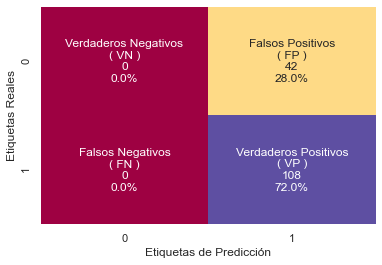

Valor de precision: 0.7200


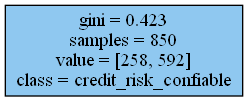

In [ ]:
#Primero realizamos la imputación, transformación, escalamiento
#y después lo pasamos como parámetros ya transformados.
#Con el método fit() se aprenden las transformaciones con los datos de entrenamiento y 
#se aplican a los dos conjuntos con el método transform()
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

#Usamos los parámetros obtenidos con GridSearchCV.
modelo = DecisionTreeClassifier(ccp_alpha=1.0, criterion='gini', max_depth=1.0, min_samples_split=2, class_weight=None).fit(X_train_transformed, Y_train)  

print('Exactitud con datos de Validación: %.1f%%' % (100 * modelo.score(X_test_transformed,Y_test)))

#Visualización el desempeño de nuestro modelo con la matriz de confusión
mi_cm(Y_test, modelo.predict(X_test_transformed))
print("Valor de precision: %.4f" % mi_precision(Y_test, modelo.predict(X_test_transformed)))


#Graficamos el árbol de decisión final obtenido
dot_data = tree.export_graphviz(decision_tree=modelo,
                                out_file=None,
                                max_depth=None,
                                feature_names=list(pd.DataFrame(X_train_transformed).columns.values),
                                class_names=['credit_risk_no_confiable','credit_risk_confiable'],
                                filled=True,
                                rotate=True,
                                proportion=False
                              )

graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

**Conclusiones:** El modelo desde el primer nodo ya tiene los elementos suficientes para predecir si una persona es clasificada como confiable a la asignación de un crédito o no lo es. Lo cual podría suponer un desbalanceo de clases, si quisieramos encontrar alguna mejora en sus predicciones, pero era de esperarse ya que este modelo es muy suceptible a sobre entrenarse con facilidad. Además, hay que tener en cuenta que al tener la precisión como métrica que se tomó en cuenta para seleccionar el modelo, esto hace que se premien aquellos parámetros que minimicen los Falsos Positivos, los cuales en este caso son nulos.

### **c) Modelo de Bosque Aleatorio con los mejores parámetros**

Exactitud con datos de Validación: 72.0%


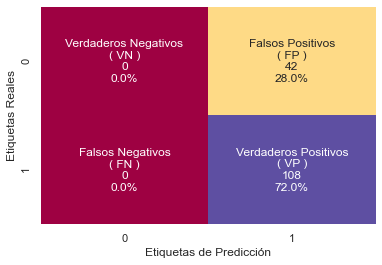

Valor de precision: 1.0000


In [ ]:
#Primero realizamos la imputación, transformación, escalamiento
#y después lo pasamos como parámetros ya transformados.
#Con el método fit() se aprenden las transformaciones con los datos de entrenamiento y 
#se aplican a los dos conjuntos con el método transform()
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

#Usamos los parámetros obtenidos con GridSearchCV.
modelo = RandomForestClassifier(ccp_alpha= 1.0, class_weight=None, criterion='gini', max_depth=1.0, min_samples_split=2).fit(X_train_transformed, Y_train)  

print('Exactitud con datos de Validación: %.1f%%' % (100 * modelo.score(X_test_transformed,Y_test)))

#Visualización el desempeño de nuestro modelo con la matriz de confusión
mi_cm(Y_test, modelo.predict(X_test_transformed))
print("Valor de precision: %.4f" % mi_recall(Y_test, modelo.predict(X_test_transformed)))


**Conclusiones:** El modelo desde el primer nodo ya tiene los elementos suficientes para predecir si una persona es clasificada como confiable a la asignación de un crédito o no lo es. Lo cual podría suponer un desbalanceo de clases, si quisieramos encontrar alguna mejora en sus predicciones, pero era de esperarse ya que este modelo es muy suceptible a sobre entrenarse con facilidad.

# **Conclusiones**
* Es importante entender el dataset que estamos utilizando y realizar las transformaciones a los nombres de columnas, tipos de variables, de tal manera que al momento de hacer transformación de datos no tengamos dificultades. Para el caso de este dataset fueron separadas las variables de acuerdo a su tipo (cuantitativas, categóricas y ordinales), las cuales en su proceso de imputación con las clases SimpleImputer, ColumnTransformer, StandardScaler, OneHotEncoder, Pipeline, median, permitieron disminuir el impacto al momento de calcular las métricas estadísticas, logrando también que la representación de los datos categóricos fuera mas expresiva. Por último, es importante para facilitar el uso de nuestros datos hacer la creación del objeto pre-procesador el cual complementa el pipeline que será utilizando en los diferentes modelos, conservando las tuplas de las transformaciones realizadas. 
* Para el caso inicial (Ejercicio 4.4) de los modelos de regresión logística, árbol de decisión y bosques aleatorios, observando las métricas tenemos que nuestra precisión en los 3 modelos tanto en el conjunto de entrenamiento como en el de validación es bastante cercana, lo cual indica que los modelos en alrededor de un 75% aciertan las predicciones y un 25% se equivocan, aunque este valor no es del todo bueno, no aplicaría para que el modelo estuviera subentrenado, además que, observando las Box-Plot con la métrica recall y los resultados del conjunto de entrenamiento, observamos un mejor desempeño con el modelo RFC, seguido del modelo de regresión logística, lo mismo que con el conjunto de prueba, al cual podemos observar que se adicionan ciertos outliers en los modelos de DT y RFC, pero que en general mantienen resultados consistentes.
* En el ejercicio 4.5 tuvimos que incrementar el valor de las muestras para los modelos y observamos que efectivamente el árbol de decisiones y los bosques aleatorios tienden a ser susceptibles a sobre entrenarse, y en algunos casos el sesgo es muy evidente entre las curvas de aprendizaje de entrenamiento y validación. 
* Para el caso de los ejercicios del ejercicio 5, utilizamos el método GridSearchCV() el cual nos ayuda bastante para encontrar los mejores hiperparámetros en cada uno de los modelos utilizados, aunque al ejecutar el método estamos requiriendo un esfuerzo computacional mayor, lo cual es lógico si tenemos en cuenta que este método hace una búsqueda en formato de malla a la vez que utiliza validación cruzada. Respecto a los resultados, obtenemos que el valor optimo C para el modelo de regresión logística es 0.1, brindándonos una exactitud en el modelo de 84%, lo cual es bastante bueno, por otro lado para el árbol de decisiones un valor de ccp_alpha de 1.0 aunque no brindándonos una exactitud muy buena, tan solo del 69% (ligero subentrenamiento), por ultimo en cuanto al bosque de decisiones, el resultado nos muestra un valor de exactitud de 1, como si el modelo estuviera aprendiendo y concluyendo en su primer nodo, lo cual puede evidenciar un ligero sobre entrenamiento con tal nivel de muestras. 
* Por último, para el ejercicio 6, al utilizar los mejores hiperparámetros, obtenemos un desempeño aceptable con el modelo de regresión logística, con un 60.7% de acierto en sus verdaderos positivos y un 12.7% en sus verdaderos negativos, aunque ligeramente altos los valores de los Falsos positivos con un 15.3% y sus Falsos negativos con 11.3%, pero brindándonos una exactitud medida con la métrica de F1_score de casi 82%. Por otro lado, en la matriz de confusión del árbol de decisiones observamos que posiblemente nos estemos enfrenando a un caso de desbalanceo de clases, al obtener un 0% en valores de VN y FN, lo cual es comprensible debido que este modelo tiende a ser propenso a sobreentrenarse con facilidad, similar el caso del bosque aleatorio. 
* En general, esta práctica nos permitió un acercamiento desde 0 a la creación de diversos modelos de aprendizaje automático, y comprender aquellas etapas clave en todo este proceso, desde el tratamiento de los datos, su procesamiento, luego el entrenamiento de los modelos, la validación, la búsqueda de mejores parámetros y finalmente obtener los mejores modelos posibles. Si bien, son muchas las etapas y que quizás en algún punto se este propenso a cometer errores ya sea en el entrenamiento debido a la selección de parámetros que no necesariamente son los mejores para el modelo, si pudimos observar mediante los diversos métodos como iba mejorando el desempeño de este, y también poner en contraste junto con otros modelos. 



### **Fin de la Actividad de la semana 6.**